**Este notebook está pensado para ejecutarse cargando solamente uno de los datasets. O bien el que contiene los comentarios cientificos o bien el que contiene los pseudocientificos, y con el que se haya decidido cargar, se hace el análisis completo.

**Carga datos búsquedas pseudocientificas**

In [1]:
import pandas as pd
df1 = pd.read_csv("Evaluated final datasets/Evaluated_pseudo_1.csv")
df2 = pd.read_csv("Evaluated final datasets/Evaluated_pseudo_2.csv")

# Combinar los DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convertir la columna 'timestamp' a formato datetime
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Obtener el nombre de la última columna
ultima_columna = combined_df.columns[-1]

# Renombrar la última columna
combined_df = combined_df.rename(columns={ultima_columna: 'Tematica del comentario'})
combined_df.dtypes

comment_id                              object
comment                                 object
timestamp                  datetime64[ns, UTC]
is_response                               bool
response_of                             object
case_id                                 object
conversation_id                         object
language                                object
emotion                                 object
Tematica del comentario                 object
dtype: object

In [2]:
print("Fecha más antigua:", combined_df['timestamp'].min())
print("Fecha más reciente:", combined_df['timestamp'].max())

Fecha más antigua: 2011-06-22 05:36:38+00:00
Fecha más reciente: 2025-05-06 00:43:54+00:00


**Carga datos búsquedas científicas**

In [ ]:
import pandas as pd
combined_df = pd.read_csv("Evaluated final datasets/Evaluated_scientific.csv")
combined_df = combined_df.iloc[:, 1:]
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])
combined_df.dtypes

In [ ]:
print("Fecha más antigua:", combined_df['timestamp'].min())
print("Fecha más reciente:", combined_df['timestamp'].max())

**Analisis del dataset escogido**

In [ ]:
combined_df['language'].value_counts()

In [ ]:
combined_df['Tematica del comentario'].value_counts()

In [ ]:
combined_df['emotion'].value_counts()

**Red de interacciones**

In [3]:
pd.options.display.max_rows = None
combined_df['activity'] = combined_df['Tematica del comentario'] + " - " + combined_df['emotion'].astype(str) 
print(combined_df['activity'].value_counts())

activity
Agradecimiento - Positivo                  6930
Petición de opinión - Positivo             4921
Intercambio de información - Positivo      3562
Petición de opinión - Negativo             2357
Apoyo emocional - Positivo                 2003
Expresión de sentimientos - Positivo       1539
Intercambio de información - Negativo      1524
Petición de opinión - Neutral              1072
Inclasificable - Positivo                   719
Intercambio de información - Neutral        700
Agradecimiento - Negativo                   596
Inclasificable - Negativo                   467
Expresión de sentimientos - Negativo        440
Opinión - Positivo                          436
Comparación - Positivo                      388
Opinión - Negativo                          330
Anécdota - Negativo                         306
Comparación - Negativo                      268
Tratamiento médico - Negativo               231
Tratamiento médico - Positivo               228
Apoyo emocional - Negativo     

**Minería de procesos**

In [4]:
from pm4py.objects.log.util import dataframe_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
# Paso 1: Renombrar columnas para pm4py
event_log = combined_df.rename(columns={
    'conversation_id': 'case:concept:name',
    'timestamp': 'time:timestamp',
    'activity': 'concept:name',

})

# Paso 2: Convertir a formato de evento
log = log_converter.apply(event_log)

event_log.head(n=5)

,comment_id,comment,time:timestamp,is_response,response_of,case_id,case:concept:name,language,emotion,Tematica del comentario,concept:name
0,UgzK88VxqOahF-KXy_F4AaABAg,Please never ever get a needle into your intes...,2024-11-05 04:33:52+00:00,False,NaN,yyRwM0QqZCs,UgzK88VxqOahF-KXy_F4AaABAg,en,Negativo,Petición de consejo,Petición de consejo - Negativo
1,UgzK88VxqOahF-KXy_F4AaABAg.AAS-K363r0VACMFCjvCJmj,They ain&#39;t poking that shit into their int...,2024-12-22 16:00:01+00:00,True,UgzK88VxqOahF-KXy_F4AaABAg,yyRwM0QqZCs,UgzK88VxqOahF-KXy_F4AaABAg,en,Negativo,Petición de opinión,Petición de opinión - Negativo
2,UgzeXJPQ5cfLPoIN6Hx4AaABAg,5:19 top left….. ?,2024-09-30 08:08:04+00:00,False,NaN,yyRwM0QqZCs,UgzeXJPQ5cfLPoIN6Hx4AaABAg,en,Positivo,Petición de opinión,Petición de opinión - Positivo
3,UgzeXJPQ5cfLPoIN6Hx4AaABAg.A9-gDRxdN26AAh2_miD7_y,Armpit hair,2024-11-11 10:10:13+00:00,True,UgzeXJPQ5cfLPoIN6Hx4AaABAg,yyRwM0QqZCs,UgzeXJPQ5cfLPoIN6Hx4AaABAg,en,Negativo,Expresión de sentimientos,Expresión de sentimientos - Negativo
4,UgyrkE3Wihi_ZBDQGgV4AaABAg,No matter what this is a placebo to me and not...,2024-09-05 22:20:42+00:00,False,NaN,yyRwM0QqZCs,UgyrkE3Wihi_ZBDQGgV4AaABAg,en,Negativo,Inclasificable,Inclasificable - Negativo


In [5]:
import pm4py
pm4py.stats.get_start_activities(log)

{'Petición de consejo - Negativo': 40,
 'Petición de opinión - Positivo': 1422,
 'Inclasificable - Negativo': 146,
 'Comparación - Positivo': 104,
 'Intercambio de información - Negativo': 439,
 'Petición de opinión - Neutral': 368,
 'Petición de opinión - Negativo': 724,
 'Agradecimiento - Positivo': 2948,
 'Intercambio de información - Positivo': 1138,
 'Inclasificable - Neutral': 51,
 'Agradecimiento - Negativo': 235,
 'Tratamiento médico - Positivo': 112,
 'Tratamiento médico - Negativo': 118,
 'Apoyo emocional - Neutral': 24,
 'Expresión de sentimientos - Negativo': 212,
 'Comparación - Negativo': 75,
 'Tratamiento pseudocientífico - Negativo': 59,
 'Anécdota - Negativo': 142,
 'Intercambio de información - Neutral': 187,
 'Tratamiento médico - Neutral': 42,
 'Expresión de sentimientos - Positivo': 704,
 'Spam - Neutral': 1,
 'Opinión - Negativo': 111,
 'Anécdota - Positivo': 124,
 'Anticipación de un evento - Positivo': 34,
 'Cumplido - Positivo': 35,
 'Anécdota - Neutral': 24,
 

In [6]:
pm4py.stats.get_end_activities(log)

{'Petición de opinión - Negativo': 569,
 'Expresión de sentimientos - Negativo': 105,
 'Petición de opinión - Positivo': 1989,
 'Intercambio de información - Positivo': 1459,
 'Inclasificable - Negativo': 130,
 'Intercambio de información - Negativo': 481,
 'Comparación - Negativo': 80,
 'Tratamiento pseudocientífico - Negativo': 40,
 'Expresión de sentimientos - Neutral': 46,
 'Intercambio de información - Neutral': 258,
 'Insulto - Negativo': 43,
 'Inclasificable - Neutral': 58,
 'Anécdota - Positivo': 40,
 'Opinión - Positivo': 125,
 'Tratamiento pseudocientífico - Positivo': 33,
 'Petición de opinión - Neutral': 324,
 'Opinión - Neutral': 54,
 'Tratamiento médico - Positivo': 44,
 'Comparación - Positivo': 113,
 'Expresión de sentimientos - Positivo': 476,
 'Opinión - Negativo': 80,
 'Agradecimiento - Neutral': 82,
 'Apoyo emocional - Positivo': 980,
 'Spam - Negativo': 3,
 'Agradecimiento - Positivo': 2668,
 'Tratamiento médico - Negativo': 47,
 'Petición de consejo - Positivo': 6

In [27]:
variantes=pm4py.get_variants_as_tuples(log)
len(variantes)

3229

In [28]:
len(event_log['case:concept:name'].unique())

11338

In [7]:
import pandas as pd

# Obtener variantes como diccionario
variantes = pm4py.get_variants_as_tuples(log)

# Convertir a DataFrame y contar cuántas veces aparece cada variante
variantes_df = pd.DataFrame({'Variantes': list(variantes.keys()), 'Repeticiones': [len(v) for v in variantes.values()]})

# Mostrar solo las 15 variantes más frecuentes
variantes_comunes = variantes_df.sort_values(by='Repeticiones', ascending=False).head(20)
variantes_comunes

,Variantes,Repeticiones
137,"(Agradecimiento - Positivo, Agradecimiento - P...",948
136,"(Agradecimiento - Positivo, Petición de opinió...",442
79,"(Agradecimiento - Positivo, Intercambio de inf...",336
213,"(Agradecimiento - Positivo, Apoyo emocional - ...",323
86,"(Intercambio de información - Positivo, Agrade...",272
88,"(Petición de opinión - Positivo, Agradecimient...",264
128,"(Petición de opinión - Positivo, Petición de o...",254
130,"(Expresión de sentimientos - Positivo, Agradec...",178
265,"(Intercambio de información - Positivo, Petici...",141
164,"(Agradecimiento - Positivo, Expresión de senti...",138


In [26]:
variantes_comunes['Repeticiones'].sum()

4363

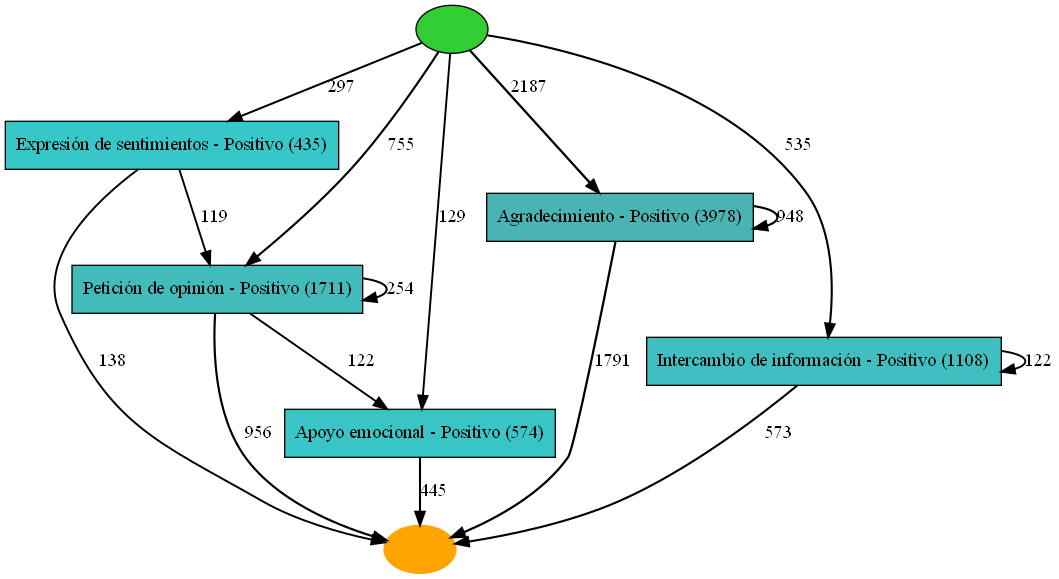

In [32]:
variantes_15 = pm4py.filter_variants_top_k(log, 15)
map = pm4py.discover_heuristics_net(variantes_15)
pm4py.view_heuristics_net(map)

**El output con el que decidí quedarme es el anterior, lo que viene a partir de aqui son simples pruebas que finalmente decidí no mantener debido a que no daba resultados satisfactorios**

In [ ]:
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

# Paso 1: Renombrar columnas para pm4py
event_log = combined_df.rename(columns={
    'conversation_id': 'case:concept:name',
    'timestamp': 'time:timestamp',
    'activity': 'concept:name',
})

# Paso 2: Filtrar actividades poco frecuentes
frecuencia_minima = 30  # Ajusta según tu necesidad
actividad_frecuencias = event_log['concept:name'].value_counts()
actividades_validas = actividad_frecuencias[actividad_frecuencias >= frecuencia_minima].index
event_log_filtrado = event_log[event_log['concept:name'].isin(actividades_validas)]

# Paso 3: Convertir a formato de evento
log_filtrado = log_converter.apply(event_log_filtrado)

# Paso 4: Minería de procesos (Alpha Miner)
net, initial_marking, final_marking = alpha_miner.apply(log_filtrado)

# Visualizar el modelo
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)



In [ ]:
from pm4py.objects.log.util import dataframe_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.heuristics import algorithm as heuristic_miner

# Paso 1: Renombrar columnas para pm4py
event_log = combined_df.rename(columns={
    'conversation_id': 'case:concept:name',
    'timestamp': 'time:timestamp',
    'Tematica del comentario': 'concept:name',
})

# Paso 2: Convertir a formato de evento
log = log_converter.apply(event_log)

# Paso 3: Minería de procesos (Heuristic Miner)
net, initial_marking, final_marking = heuristic_miner.apply(log)

# Visualizar el modelo
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)


In [ ]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.algo.discovery.heuristics import algorithm as heuristic_miner
from pm4py.statistics.traces.generic.log import case_statistics

# Paso 1: Obtener las actividades más frecuentes
activities = list(set(event_log["concept:name"]))  # Extrae todas las actividades únicas

# Paso 2: Filtrar eventos con actividad poco frecuente
filtered_log = attributes_filter.apply_events(log, values=activities, parameters={
    "decreasingFactor": 0.2  # Ajusta este umbral según lo que quieras visualizar
})


In [ ]:
# Paso 3: Filtrar conexiones en la red de Petri según su frecuencia mínima
df_freq = case_statistics.get_variant_statistics(filtered_log)
min_freq = int(sum([x["count"] for x in df_freq]) * 0.2)  # 20% más frecuente

filtered_net, filtered_initial_marking, filtered_final_marking = heuristic_miner.apply(filtered_log, parameters={"min_occurrences": min_freq})

# Paso 4: Visualizar el modelo filtrado
gviz_filtered = pn_visualizer.apply(filtered_net, filtered_initial_marking, filtered_final_marking)
pn_visualizer.view(gviz_filtered)

In [ ]:
from pm4py.objects.log.util import dataframe_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.conversion.process_tree import converter as pt_converter

# Paso 1: Renombrar columnas para pm4py
event_log = combined_df.rename(columns={
    'conversation_id': 'case:concept:name',
    'timestamp': 'time:timestamp',
    'activity': 'concept:name',
})

# Paso 2: Convertir a formato de evento
log = log_converter.apply(event_log)

# Paso 3: Aplicar Inductive Miner para obtener un árbol de proceso
process_tree = inductive_miner.apply(log)

# Paso 4: Convertir el árbol de proceso a una red de Petri
net, initial_marking, final_marking = pt_converter.apply(process_tree)

# Visualizar el modelo generado
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)


In [ ]:
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.statistics.traces.generic.log import case_statistics

# Paso 1: Obtener estadísticas de frecuencia del log
df_freq = case_statistics.get_variant_statistics(log)

# Paso 2: Definir umbral de frecuencia mínima (ajustable)
min_freq = int(sum([x["count"] for x in df_freq]) * 0.0000000000000000001)  # 10% de los eventos más comunes

# Paso 3: Aplicar filtro sobre el log original
filtered_log = attributes_filter.apply_events(log, values=[x["variant"] for x in df_freq if x["count"] >= min_freq])

# Paso 4: Aplicar Inductive Miner nuevamente sobre el log filtrado
process_tree = inductive_miner.apply(filtered_log)

# Paso 5: Convertir a red de Petri
filtered_net, filtered_initial_marking, filtered_final_marking = pt_converter.apply(process_tree)

# Paso 6: Visualizar el modelo filtrado
gviz_filtered = pn_visualizer.apply(filtered_net, filtered_initial_marking, filtered_final_marking)
pn_visualizer.view(gviz_filtered)
